In [1]:
# Part 1 - Sklearn installation and verification
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')
import numpy as np
import matplotlib.pyplot as plt
print('All libraries loaded successfully!')


scikit-learn version: 1.6.1
All libraries loaded successfully!


In [2]:
# Part 2 - Loading the dataset
from sklearn.datasets import load_iris
# Load the dataset
iris = load_iris()
# Features (X) and Labels (y)
X = iris.data # Shape: (150, 4)
y = iris.target # Shape: (150,)
# Let‘s see what we have
print(f'Feature names: {iris.feature_names}')
print(f'Target names: {iris.target_names}')
print(f'Data shape: {X.shape}')
print(f'First 3 rows:\n{X[:3]}')


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
First 3 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


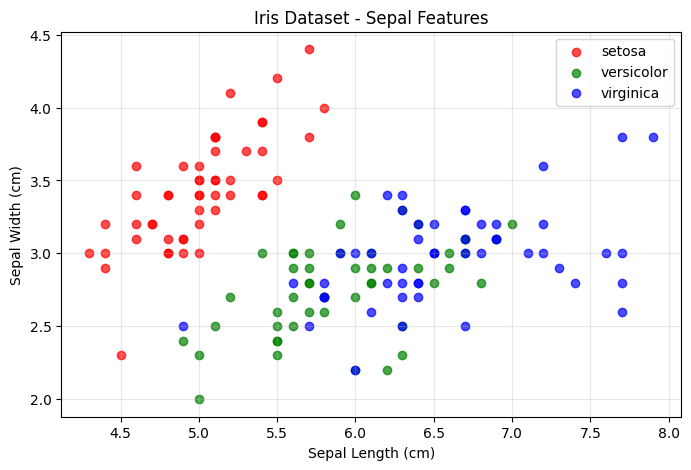

In [3]:
# Part 3 - Creating a scater plot for Sepal Features

plt.figure(figsize=(8, 5))
colors = ['red', 'green', 'blue']
for i, name in enumerate(iris.target_names):
  mask = y == i
  plt.scatter(X[mask, 0], X[mask, 1],
  color=colors[i], label=name, alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Features')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()


In [4]:
# Task 1.1
# Print first 10 rows of X and Y
print("\nFirst 10 rows of X and y:")
for i in range(10):
    print(f"X[{i}] = {X[i]}  \t  y[{i}] = {y[i]}")



First 10 rows of X and y:
X[0] = [5.1 3.5 1.4 0.2]  	  y[0] = 0
X[1] = [4.9 3.  1.4 0.2]  	  y[1] = 0
X[2] = [4.7 3.2 1.3 0.2]  	  y[2] = 0
X[3] = [4.6 3.1 1.5 0.2]  	  y[3] = 0
X[4] = [5.  3.6 1.4 0.2]  	  y[4] = 0
X[5] = [5.4 3.9 1.7 0.4]  	  y[5] = 0
X[6] = [4.6 3.4 1.4 0.3]  	  y[6] = 0
X[7] = [5.  3.4 1.5 0.2]  	  y[7] = 0
X[8] = [4.4 2.9 1.4 0.2]  	  y[8] = 0
X[9] = [4.9 3.1 1.5 0.1]  	  y[9] = 0


In [5]:
# Task 1.2
# Checking class ditribution
unique_classes, counts = np.unique(y, return_counts=True)

print("\nClass distribution:")
for cls, count in zip(unique_classes, counts):
    print(f"Class {cls} ({iris.target_names[cls]}): {count} samples")


Class distribution:
Class 0 (setosa): 50 samples
Class 1 (versicolor): 50 samples
Class 2 (virginica): 50 samples


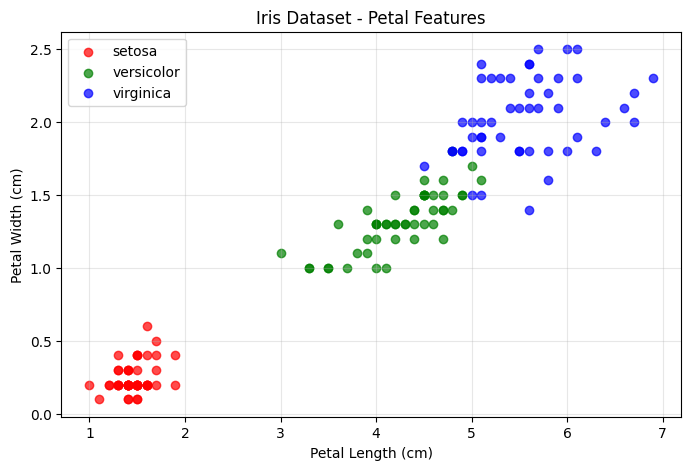

In [6]:
# Task 1.3
# Creating a scater plot for Petal Features
plt.figure(figsize=(8, 5))
colors = ['red', 'green', 'blue']
for i, name in enumerate(iris.target_names):
  mask = y == i
  plt.scatter(X[mask, 2], X[mask, 3],
  color=colors[i], label=name, alpha=0.7)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset - Petal Features')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

##### Petal Features are better as Vericolor and Virginica as both are separated much better in this representation (almost no overlapping)

In [7]:
# Part 4 - Splitting data for training and testing

from sklearn.model_selection import train_test_split
# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2, # 20% for testing
random_state=42, # For reproducibility
stratify=y # Keep class proportions balanced
)
print(f'Training set: {X_train.shape[0]} samples')
print(f'Testing set: {X_test.shape[0]} samples')


Training set: 120 samples
Testing set: 30 samples


In [8]:
# Task 2.1
# Printing the shape of the splitted data
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (120, 4)
X_test shape : (30, 4)
y_train shape: (120,)
y_test shape : (30,)


In [9]:
# Task 2.2
# Check class balance in training set
unique_train, counts_train = np.unique(y_train, return_counts=True)
print("\nTraining class distribution (with stratify):")
for cls, count in zip(unique_train, counts_train):
    print(f"Class {cls} ({iris.target_names[cls]}): {count}")

# Check class balance in test set
unique_test, counts_test = np.unique(y_test, return_counts=True)
print("\nTesting class distribution (with stratify):")
for cls, count in zip(unique_test, counts_test):
    print(f"Class {cls} ({iris.target_names[cls]}): {count}")


Training class distribution (with stratify):
Class 0 (setosa): 40
Class 1 (versicolor): 40
Class 2 (virginica): 40

Testing class distribution (with stratify):
Class 0 (setosa): 10
Class 1 (versicolor): 10
Class 2 (virginica): 10


##### If stratify=y is removed, the original propotion between the classes will no longer be preserved due to random splitting. For this case, the sample is too small for any chnage to be noticed between the startified and unstratified splitting but for larger datasets, there might be more unbalanced or skrewed splitting.


In [10]:
# Part 5 - Training our First Model
# Model A: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Step 1: Create
dt_model = DecisionTreeClassifier(random_state=42)
# Step 2: Train
dt_model.fit(X_train, y_train)
# Step 3: Predict
dt_predictions = dt_model.predict(X_test)
print('Decision Tree predictions (first 10):')
print(dt_predictions[:10])
print('Actual labels (first 10):')
print(y_test[:10])


Decision Tree predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]
Actual labels (first 10):
[0 2 1 1 0 1 0 0 2 1]


In [11]:
# Model B: K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
# Step 1: Create (k=5 neighbors)
knn_model = KNeighborsClassifier(n_neighbors=10)
# Step 2: Train
knn_model.fit(X_train, y_train)
# Step 3: Predict
knn_predictions = knn_model.predict(X_test)
print('KNN predictions (first 10):')
print(knn_predictions[:10])

KNN predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]


#### Task 3.1 - Is there any difference between the prediction results for both models?
##### No, there is no difference(the results from both the models are same)

#### Task 3.2 - Changing n_neighbours from 5 to 3 to 10
##### There is no change in the output when we chnage the n_neighbours value

In [12]:
# Part 6 - Model Evaluation
# Accuracy score evaluation

from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, dt_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy:.2%}')
print(f'KNN Accuracy: {knn_accuracy:.2%}')


Decision Tree Accuracy: 93.33%
KNN Accuracy: 100.00%


In [13]:
# Precision, recall, and F1-score evaluation (classification report)
from sklearn.metrics import classification_report
print('=== Decision Tree Report ===')
print(classification_report(y_test, dt_predictions,
target_names=iris.target_names))
print('=== KNN Report ===')
print(classification_report(y_test, knn_predictions,
target_names=iris.target_names))


=== Decision Tree Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

=== KNN Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



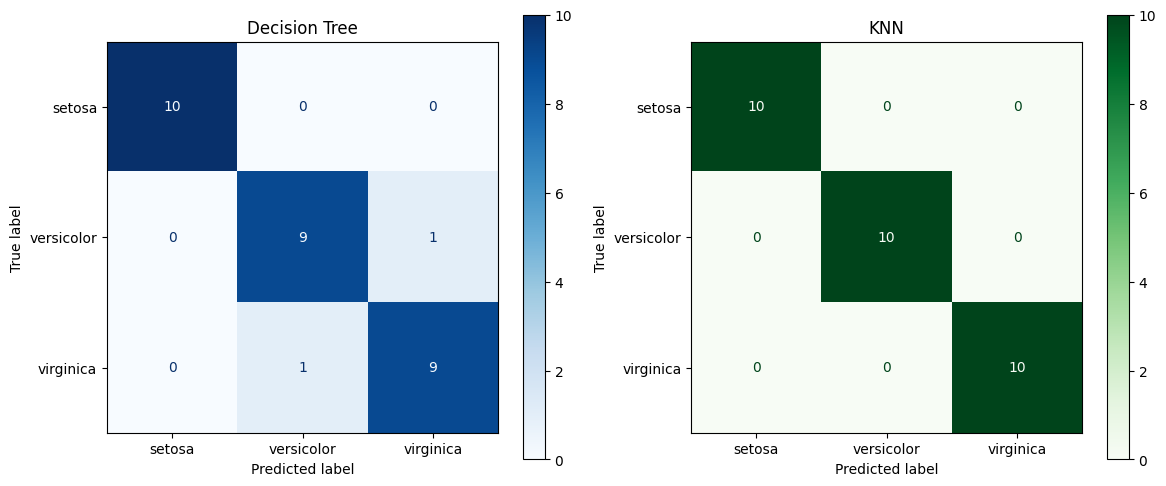

In [14]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Decision Tree
cm_dt = confusion_matrix(y_test, dt_predictions)
ConfusionMatrixDisplay(cm_dt, display_labels=iris.target_names)\
.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Decision Tree')


# KNN
cm_knn = confusion_matrix(y_test, knn_predictions)
ConfusionMatrixDisplay(cm_knn, display_labels=iris.target_names)\
.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('KNN')
plt.tight_layout()
plt.show()


#### Task 4.1 - Which model has better accuracy?
##### Both models have exactky the same accuracy.

#### Task 4.2 - Which class was hardest to classify and why?
##### ----

#### Task 4.3 - Which metric (precision or recall) would be more important in a medical diagnosis  scenario?
##### In a medical diagnosis scenario, recall is more important because it prioritizes catching all true positives (e.g., detecting all actual cancer cases) to avoid missing diagnoses, even if it means some false positives that can be ruled out with further tests.

In [15]:
# Task 5
# Predicting new samples

import numpy as np
# A new flower measurement (sepal_l, sepal_w, petal_l, petal_w)
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])
flowerA = np.array([[6.7, 3.0, 5.2, 2.3]])
flowerB = np.array([[5.8, 2.7, 4.1, 1.0]])
flowerC = np.array([[4.9, 3.1, 1.5, 0.1]])

# Predict with both models
dt_pred = dt_model.predict(new_flower)
knn_pred = knn_model.predict(new_flower)
print("New flower prediction:")
print(f'Decision Tree says: {iris.target_names[dt_pred[0]]}')
print(f'KNN says: {iris.target_names[knn_pred[0]]}\n')

# Predicting flowers A,B and C using both models

dt_pred = dt_model.predict(flowerA)
knn_pred = knn_model.predict(flowerA)
print("Flower A prediction:")
print(f'Decision Tree says: {iris.target_names[dt_pred[0]]}')
print(f'KNN says: {iris.target_names[knn_pred[0]]}\n')

dt_pred = dt_model.predict(flowerB)
knn_pred = knn_model.predict(flowerB)
print("Flower B prediction:")
print(f'Decision Tree says: {iris.target_names[dt_pred[0]]}')
print(f'KNN says: {iris.target_names[knn_pred[0]]}\n')

dt_pred = dt_model.predict(flowerC)
knn_pred = knn_model.predict(flowerC)
print("Flower C prediction:")
print(f'Decision Tree says: {iris.target_names[dt_pred[0]]}')
print(f'KNN says: {iris.target_names[knn_pred[0]]}')

New flower prediction:
Decision Tree says: setosa
KNN says: setosa

Flower A prediction:
Decision Tree says: virginica
KNN says: virginica

Flower B prediction:
Decision Tree says: versicolor
KNN says: versicolor

Flower C prediction:
Decision Tree says: setosa
KNN says: setosa


##### Both models agree on all three predictions

In [16]:
# Part 7.1 - creating the CSV file
import pandas as pd
import numpy as np
# Create a simple student performance dataset
np.random.seed(42)
n = 100
data = {
'study_hours': np.round(np.random.uniform(1, 10, n), 1),
'attendance_pct': np.round(np.random.uniform(40, 100, n), 1),
'assignments': np.random.randint(3, 10, n),
'passed': np.random.choice([0, 1], n, p=[0.35, 0.65])
}
df = pd.DataFrame(data)
df.to_csv('students.csv', index=False)
print('CSV saved! First 5 rows:')
print(df.head())


CSV saved! First 5 rows:
   study_hours  attendance_pct  assignments  passed
0          4.4            41.9            6       0
1          9.6            78.2            5       1
2          7.6            58.9            3       1
3          6.4            70.5            6       1
4          2.4            94.5            8       1


In [17]:
# Importing the CSV file
import pandas as pd
# Read the CSV file
df = pd.read_csv('students.csv')
# Quick exploration
print(f'Shape: {df.shape}')
print(f'\nColumn types:\n{df.dtypes}')
print(f'\nBasic stats:\n{df.describe()}')

Shape: (100, 4)

Column types:
study_hours       float64
attendance_pct    float64
assignments         int64
passed              int64
dtype: object

Basic stats:
       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000       40.400000     3.000000    0.000000
25%       2.775000       54.500000     4.750000    0.000000
50%       5.150000       70.350000     6.000000    1.000000
75%       7.600000       85.975000     8.000000    1.000000
max       9.900000       99.100000     9.000000    1.000000


In [18]:
# Separating features and target
# Features = all columns except ‘passed‘
X = df[['study_hours', 'attendance_pct', 'assignments']].values
# Target = the ‘passed‘ column
y = df['passed'].values
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')
print(f'Class counts: {np.unique(y, return_counts=True)}')


Features shape: (100, 3)
Target shape: (100,)
Class counts: (array([0, 1]), array([31, 69]))


In [19]:
# Full workflow application
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# Split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)
# Train
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Predict & Evaluate
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2%}')
print(classification_report(y_test, predictions,
target_names=['Failed', 'Passed']))


Accuracy: 55.00%
              precision    recall  f1-score   support

      Failed       0.33      0.50      0.40         6
      Passed       0.73      0.57      0.64        14

    accuracy                           0.55        20
   macro avg       0.53      0.54      0.52        20
weighted avg       0.61      0.55      0.57        20



In [20]:
# Task 6.1 - CSV file exploration
print(df.info(), "\n")
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   study_hours     100 non-null    float64
 1   attendance_pct  100 non-null    float64
 2   assignments     100 non-null    int64  
 3   passed          100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None 

       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000       40.400000     3.000000    0.000000
25%       2.775000       54.500000     4.750000    0.000000
50%       5.150000       70.350000     6.000000    1.000000
75%       7.600000       85.975000     8.000000    1.000000
max       9.900000       99.100000     9.000000    1.000000


In [21]:
# Task 6.2 - Training the Decision Tree and KNN models
# Decision Tree Training
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
print(f"Decision Tree accuracy: {dt_acc:.2%}")
print("=== Decision Tree report ===")
print(classification_report(y_test, dt_pred, target_names=["Failed", "Passed"]))

# KNN (k = 5) training
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
print(f"\nKNN (k=5) accuracy: {knn_acc:.2%}")
print("=== KNN report ===")
print(classification_report(y_test, knn_pred, target_names=["Failed", "Passed"]))

Decision Tree accuracy: 55.00%
=== Decision Tree report ===
              precision    recall  f1-score   support

      Failed       0.33      0.50      0.40         6
      Passed       0.73      0.57      0.64        14

    accuracy                           0.55        20
   macro avg       0.53      0.54      0.52        20
weighted avg       0.61      0.55      0.57        20


KNN (k=5) accuracy: 60.00%
=== KNN report ===
              precision    recall  f1-score   support

      Failed       0.33      0.33      0.33         6
      Passed       0.71      0.71      0.71        14

    accuracy                           0.60        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.60      0.60      0.60        20



#### Which model perfoms better?

##### KNN performs better as it has a better accuracy reading (60% compared to 55% of Decesion Tree)

In [22]:
# Adding a new column and retraining

# Adding a new column
np.random.seed(42)
df["quiz_score"] = np.random.randint(0, 11, size=len(df))

# New features include quiz_score
X2 = df[["study_hours", "attendance_pct", "assignments", "quiz_score"]].values
y2 = df["passed"].values

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2,
    test_size=0.2,
    random_state=42,
    stratify=y2
)

# Decision Tree with quiz
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X2_train, y2_train)
dt2_pred = dt2.predict(X2_test)
dt2_acc = accuracy_score(y2_test, dt2_pred)
print(f"\nDecision Tree with quiz accuracy: {dt2_acc:.2%}")

# KNN with quiz
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X2_train, y2_train)
knn2_pred = knn2.predict(X2_test)
knn2_acc = accuracy_score(y2_test, knn2_pred)
print(f"KNN (k=5) with quiz accuracy: {knn2_acc:.2%}")


Decision Tree with quiz accuracy: 65.00%
KNN (k=5) with quiz accuracy: 65.00%


#### Did accuracy improve for the models?
##### Yes accuracy improves for both models

### Final Report (5 - 7 lines)
##### In this lab, both the Decision Tree classifier and a K‑Nearest Neighbors (KNN) model were trained and evaluated on the Iris dataset and a student performance dataset. On the Iris data, both models achieved the same accuracy and produced identical predictions on the test set. On the students.csv data, however, KNN achieved slightly higher accuracy than the Decision Tree, especially for predicting which students passed. After adding an extra feature (quiz score), the performance of both models improved, which suggests that this new variable provides useful information for the prediction task. The Decision Tree is easier to interpret because its decision rules can be visualized, but KNN gave better quantitative results on this dataset. For this task, I would choose KNN as my primary model, while keeping the Decision Tree as a more interpretable baseline for explaining the predictions.